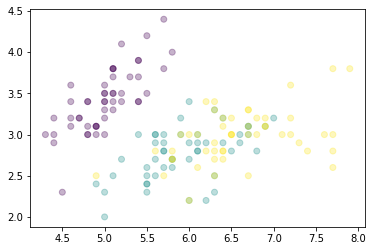

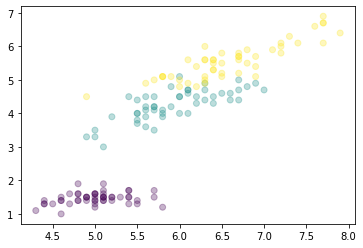

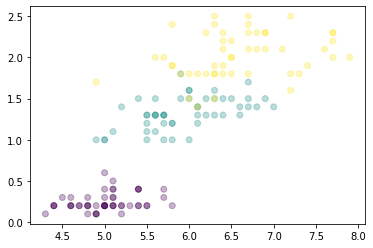

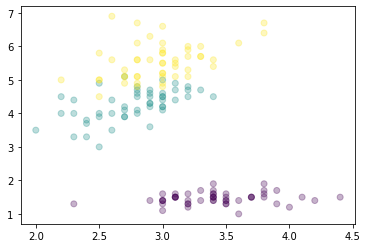

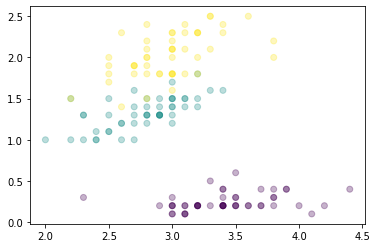

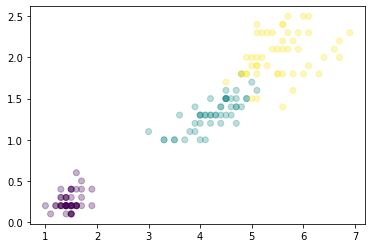

In [12]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from collections import Counter

data = []
with open('iris.data','r') as f:
  for line in f:
    if (line.strip() != ''):
      items = line.strip().split(",")
      vector = [float(v) for v in items[:4]] #숫자로 바꾸기
      answer = items[4]
      data.append((vector,answer))

# species = {n: i for i, n in enumerate(set(d[1] for d in data))}
species = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
data = [(d[0], species[d[1]]) for d in data]

for i in range(4):
  for j in range(i+1, 4):
    X = [d[0][i] for d in data]
    Y = [d[0][j] for d in data]
    C = [d[1] for d in data]

    plt.scatter(X,Y, c=C, alpha = 0.3)
    plt.show()

In [13]:
random.shuffle(data)
train_size = int(len(data) * 0.8)


train = data[:train_size]
test = data[train_size:]


#p1, p2:같은 차원의 vector 2개
def distance(p1, p2):
  sum = 0
  for i in range(len(p1)):
    sum += (p1[i] - p2[i]) ** 2
  return sum ** 0.5


def knn_classify(k, query, train):
  knns = sorted((distance(query, point[0]),point) for point in train)[:k]

  # 거리에따라 가중치를 주어 점수 계산
  scores = {}
  for dist, point in knns:
    scores[point[1]] = scores.get(point[1], 0) + 1/(1+dist)

  x = Counter(d[1][1] for d in knns).most_common(1)

  return x[0][0]

answer = knn_classify(3,test[0][0],train)
print("query: ", test[0])
print("asnwer: ", answer)

query:  ([6.4, 3.1, 5.5, 1.8], 2)
asnwer:  2


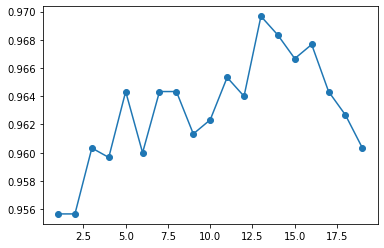

In [14]:
from tqdm.notebook import tqdm

num_trials = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

corrects = [0] * 20

for i in tqdm(range(num_trials)):
  random.shuffle(data)
  train = data[:train_size]
  test = data[train_size:]

  for k in range(1, 20):
    corrects[k] += sum(1 for t in test if knn_classify(k, t[0], train) == t[1])

for k in range(1,20):
  corrects[k] /=  test_size * num_trials

plt.plot(range(1,20), corrects[1:],'o-')
plt.show()